<a href="https://colab.research.google.com/github/Praneethkumar57/Deeplearning_projs/blob/main/Rice_type_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: praneethkumar57 
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 1.08GB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1,inplace=True)
print(data_df.shape)

(18185, 11)


In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data_df['Class'].unique())

[1 0]


In [ ]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:,-1])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size = 0.5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self,index):
    return self.X[index], self.Y[index]

In [ ]:
training_data = dataset(X_train, Y_train)
validation_data = dataset(X_val, Y_val)
testing_data = dataset(X_test, Y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size = 32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size = 32, shuffle=True)

In [ ]:
for x,y in train_dataloader:
  print(x)
  print("---------------------")
  print(y)
  break

tensor([[0.5661, 0.7691, 0.6428, 0.9582, 0.5362, 0.7524, 0.6236, 0.6282, 0.7867,
         0.6788],
        [0.7764, 0.8108, 0.8370, 0.9157, 0.7378, 0.8811, 0.8164, 0.7075, 0.8507,
         0.5496],
        [0.8811, 0.8659, 0.8864, 0.9177, 0.8356, 0.9387, 0.9103, 0.7464, 0.8673,
         0.5542],
        [0.5571, 0.6899, 0.7091, 0.9168, 0.5311, 0.7464, 0.6781, 0.5976, 0.8554,
         0.5520],
        [0.8980, 0.9033, 0.8659, 0.9329, 0.8534, 0.9477, 0.6344, 0.7707, 0.8292,
         0.5919],
        [0.6225, 0.7985, 0.6788, 0.9555, 0.5957, 0.7890, 0.8466, 0.6782, 0.7423,
         0.6674],
        [0.6178, 0.8150, 0.6723, 0.9603, 0.5938, 0.7860, 0.7735, 0.6824, 0.7277,
         0.6878],
        [0.7923, 0.8148, 0.8479, 0.9136, 0.7498, 0.8901, 0.8123, 0.7079, 0.8671,
         0.5452],
        [0.6517, 0.8967, 0.6364, 0.9800, 0.6200, 0.8073, 0.9028, 0.7132, 0.7026,
         0.7993],
        [0.9456, 0.9284, 0.8823, 0.9347, 0.8963, 0.9724, 0.8812, 0.7919, 0.8269,
         0.5970],
        [0

In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [ ]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)
    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()
    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)

      total_loss_val += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()

      total_acc_val += acc


  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/1000,4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100,4))

  print(f'Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy {round(total_acc_train/training_data.__len__()*100,4)}  Validation Loss: {round(total_loss_val/1000,4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100,4)}')

  print("#"*25)

Epoch no. 1 Train Loss: 0.2595 Train Accuracy 65.1583  Validation Loss: 0.0465 Validation Accuracy: 98.0205
#########################
Epoch no. 2 Train Loss: 0.1418 Train Accuracy 97.7767  Validation Loss: 0.0185 Validation Accuracy: 97.3607
#########################
Epoch no. 3 Train Loss: 0.0602 Train Accuracy 98.3345  Validation Loss: 0.0099 Validation Accuracy: 98.1305
#########################
Epoch no. 4 Train Loss: 0.0365 Train Accuracy 98.5388  Validation Loss: 0.0071 Validation Accuracy: 98.2771
#########################
Epoch no. 5 Train Loss: 0.0276 Train Accuracy 98.6409  Validation Loss: 0.0057 Validation Accuracy: 98.2038
#########################
Epoch no. 6 Train Loss: 0.0232 Train Accuracy 98.6566  Validation Loss: 0.0051 Validation Accuracy: 98.1305
#########################
Epoch no. 7 Train Loss: 0.0207 Train Accuracy 98.7116  Validation Loss: 0.0046 Validation Accuracy: 98.2405
#########################
Epoch no. 8 Train Loss: 0.0193 Train Accuracy 98.7037  Validat

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test

    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print("Accuracy: ", round(total_acc_test/testing_data.__len__() * 100,4))

Accuracy:  98.607


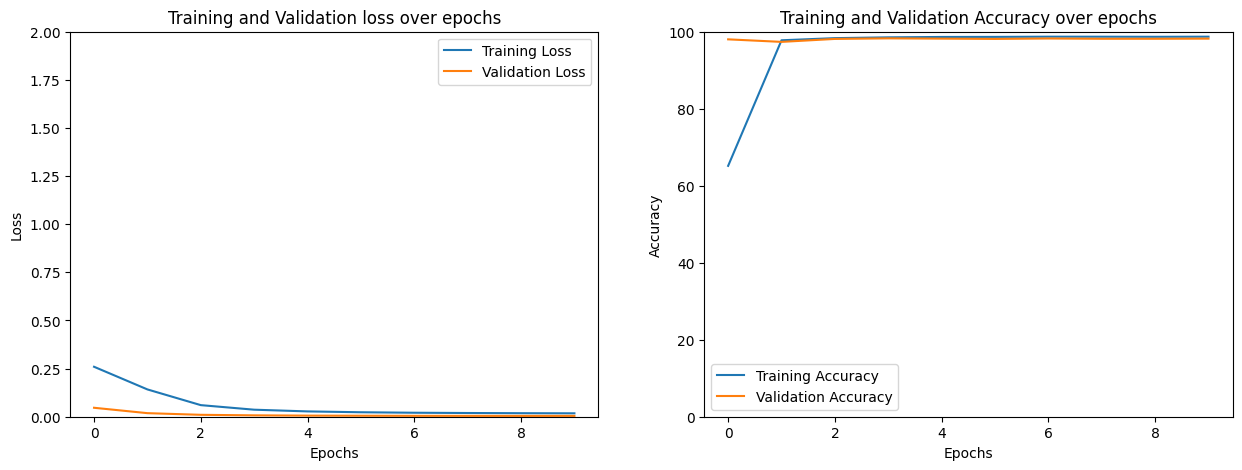

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (15,5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy over epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()